In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('abalone.csv')


In [ ]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <a list of 10 Patch objects>)

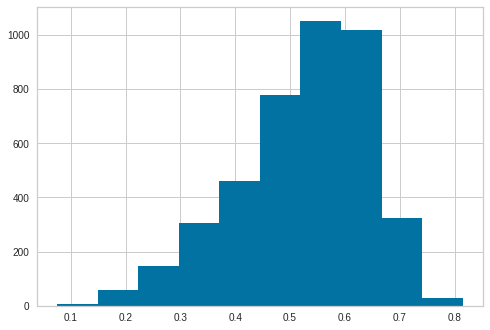

In [ ]:
plt.hist(df['Length'])


(array([  13.,   66.,  180.,  344.,  513.,  812., 1017.,  934.,  275.,
          23.]),
 array([0.055 , 0.1145, 0.174 , 0.2335, 0.293 , 0.3525, 0.412 , 0.4715,
        0.531 , 0.5905, 0.65  ]),
 <a list of 10 Patch objects>)

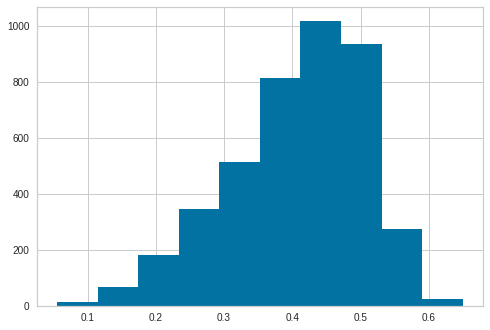

In [ ]:
plt.hist(df['Diameter'])


(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

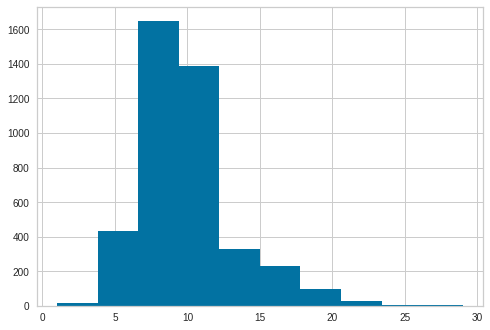

In [ ]:
plt.hist(df['Rings'])


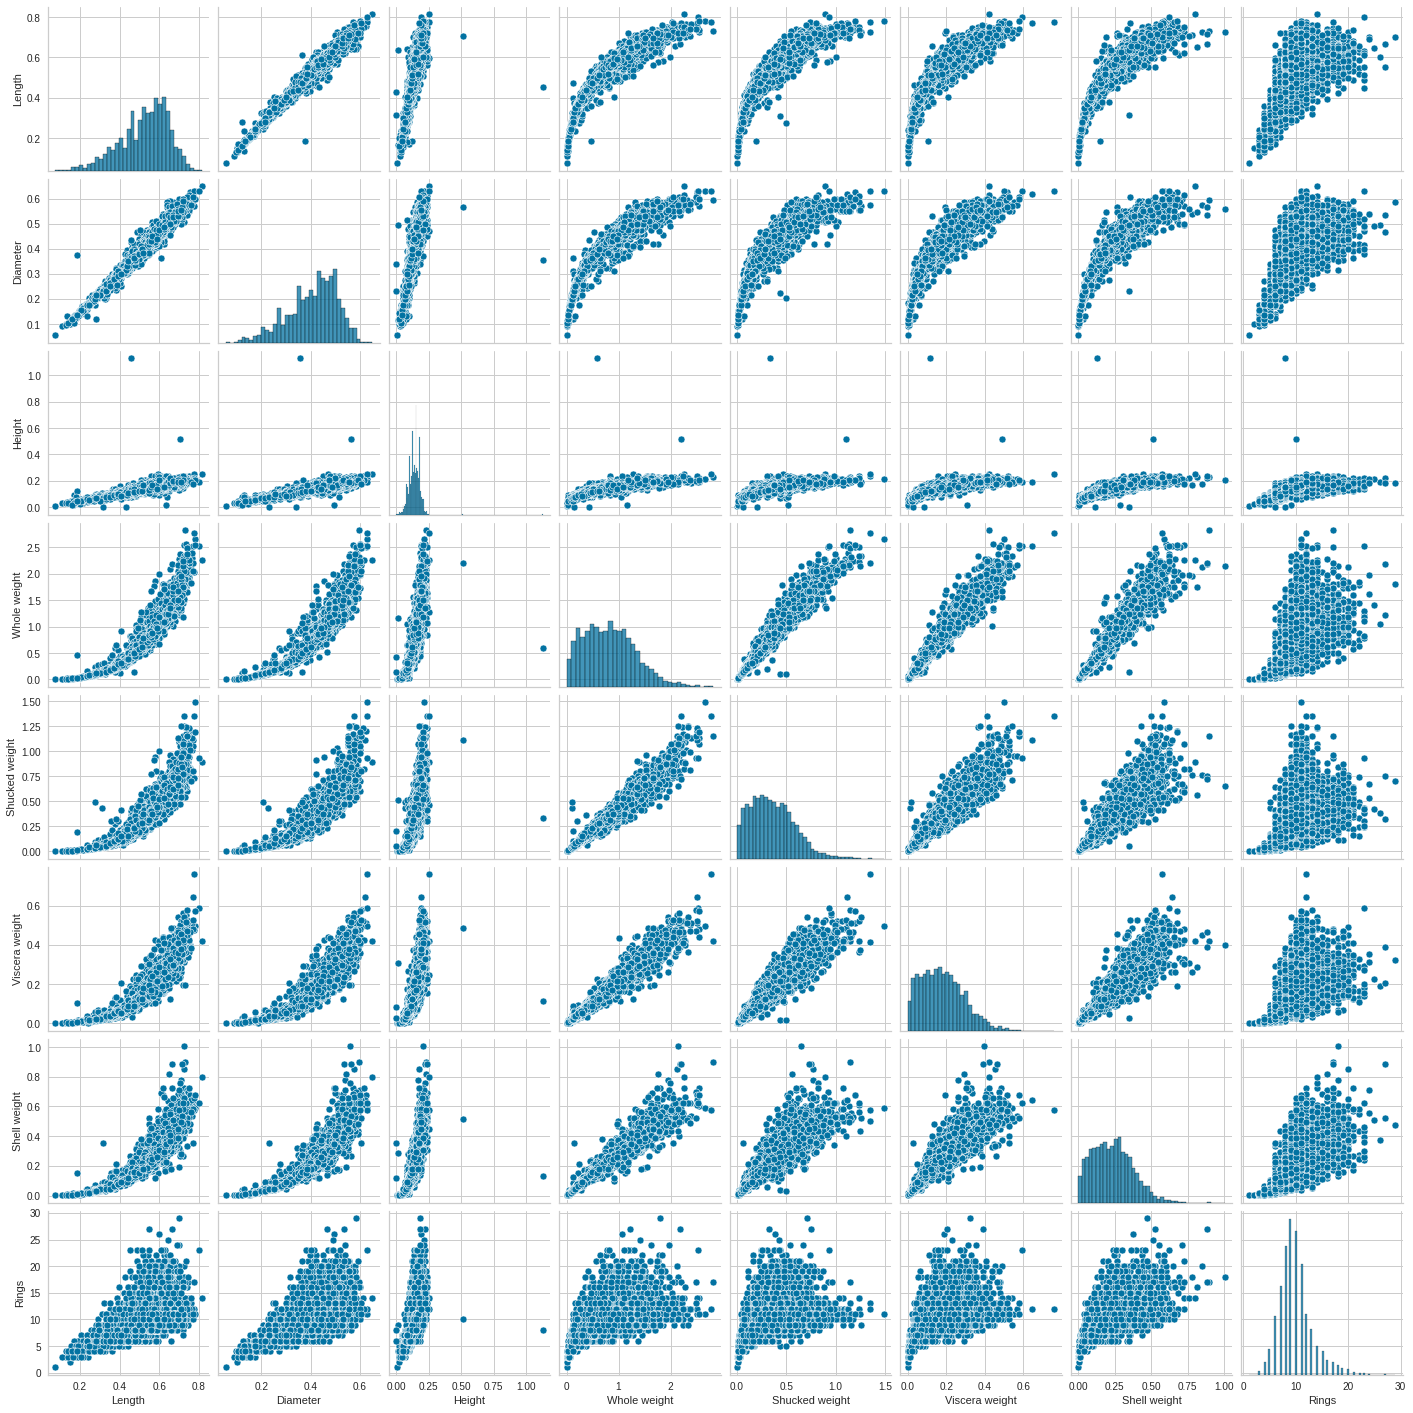

In [ ]:
sns.pairplot(df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


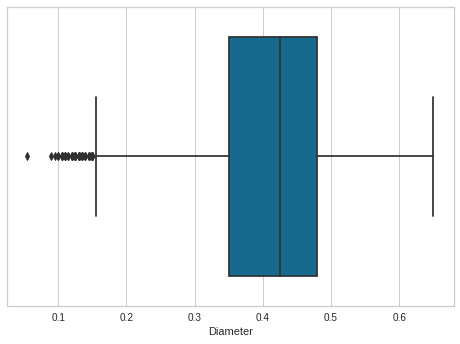

In [ ]:
sns.boxplot(df['Diameter'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


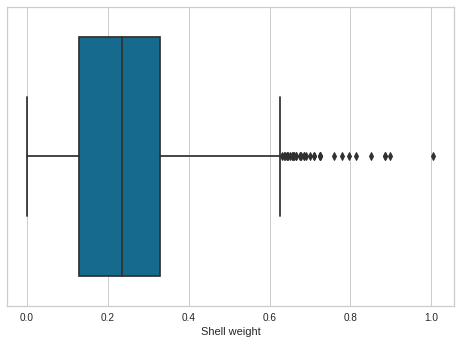

In [ ]:
sns.boxplot(df['Shell weight'])


In [ ]:
data = df
credit = data.loc[data['Shell weight']>0.6, 'Shell weight'].median()
prod = data.loc[data['Whole weight']>=2.25, 'Whole weight'].median()
data.loc[data['Shell weight']>0.6, 'Shell weight']=np.nan
data.fillna(credit,inplace=True)
data.loc[data['Whole weight']>=2.25, 'Whole weight']=np.nan
data.fillna(prod,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


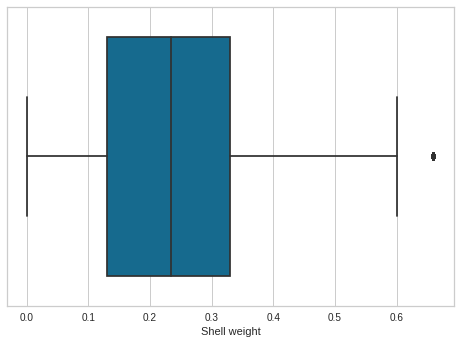

In [ ]:
sns.boxplot(df['Shell weight'])


In [ ]:
le = LabelEncoder()


In [ ]:
data['Sex'] = le.fit_transform(data['Sex'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
scale = StandardScaler()
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x = scale.fit_transform(x)
x

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.64243771],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.22335859],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20674706],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.50488102],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41774288],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.86278356]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3341, 8), (836, 8), (3341,), (836,))

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)


In [ ]:
from sklearn import metrics

In [ ]:
df1 = pd.DataFrame({'Predicted':y_pred, 'True':y_test})

In [ ]:
df1

,Predicted,True
197,15.439391,16
1738,12.123024,11
1254,7.975010,7
4084,10.641698,10
3503,12.234943,11
...,...,...
3762,9.399024,8
3151,17.426495,21
1137,8.610028,10
3674,9.927090,12


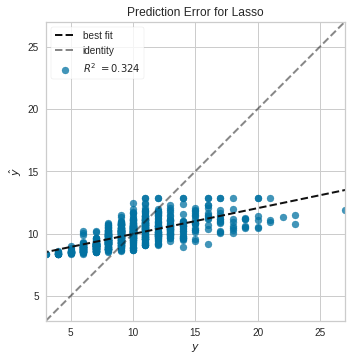

In [ ]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
visualizer.show()                
